In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#Data Cleanup
df = pd.read_csv(r"C:\Users\Jesse\OneDrive\Desktop\SuperStoreAnalysis\SuperStoreOrders.csv")
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')
df['sales']=df['sales'].str.replace(',','').astype('int64')
# operating on the assumption that the sales and profit column are in dollars

In [2]:
df['discount'].unique()
# len(df['discount'].unique())

df.groupby(['discount','sales']).size()

discount  sales
0.00      1         2
          2        13
          3        42
          4        80
          5        93
                   ..
0.80      1525      1
          1890      1
          2178      1
0.85      242       1
          555       1
Length: 8045, dtype: int64

In [3]:
df[['discount', 'sales']].corr()

,discount,sales
discount,1.000000,-0.086728
sales,-0.086728,1.000000


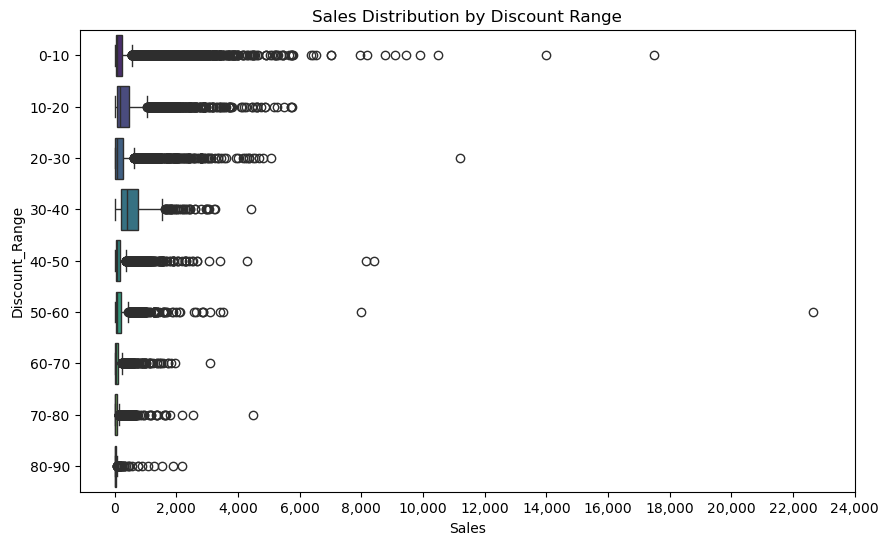

In [4]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df['discount(%)']= df['discount']*100
df['discount_bin'] = pd.cut(df['discount(%)'], bins=bins, labels=labels, right=False)
df=df.drop(labels='discount(%)',axis=1)
df
plt.figure(figsize=(10, 6))
ax=sns.boxplot(y='discount_bin', x='sales', hue='discount_bin',data=df,palette='viridis')
xticks = range(0, int(df['sales'].max()) + 2000, 2000)
ax.set_xticks(xticks)
ax.set_xticklabels([f'{i:,}' for i in xticks])
plt.title('Sales Distribution by Discount Range')
plt.ylabel('Discount_Range')
plt.xlabel('Sales')
plt.show()

In [5]:
# df_20to30=df[df['discount_bin'] =='70-80']

# df_20to30=df_20to30[['discount','sales']].corr()
# df_20to30.loc['discount','sales']

bin_list = []
unique_bins=df['discount_bin'].unique()

for bin in unique_bins:
    df_plot=df[df['discount_bin'] ==bin]
    if not df_plot.empty:   
        corr_matx=df_plot[['discount','sales']].corr()
        answ=corr_matx.loc['discount','sales']
        bin_list.append((bin,answ))
    else:
        bin_list.append((bin, None))

df_bin=pd.DataFrame(bin_list,columns=['Discount','Correlation_x']).sort_values(by='Discount')
sum_bin=df.groupby('discount_bin')['sales'].sum().to_frame(name='Sales_per_bin').reset_index()
df_bin_merged=df_bin.merge(sum_bin,how='inner',left_on='Discount',right_on='discount_bin').fillna(value=0,axis=1)
df_bin_merged 


C:\Users\Jesse\AppData\Local\Temp\ipykernel_13036\2701331010.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_bin=df.groupby('discount_bin')['sales'].sum().to_frame(name='Sales_per_bin').reset_index()


,Discount,Correlation_x,discount_bin,Sales_per_bin
0,0-10,0.085195,0-10,7375749
1,10-20,0.015394,10-20,2133059
2,20-30,0.028555,20-30,1397482
3,30-40,0.037114,30-40,330723
4,40-50,-0.08703,40-50,710123
5,50-60,0.077727,50-60,338597
6,60-70,0.141437,60-70,196143
7,70-80,0,70-80,139770
8,80-90,0.116922,80-90,21259


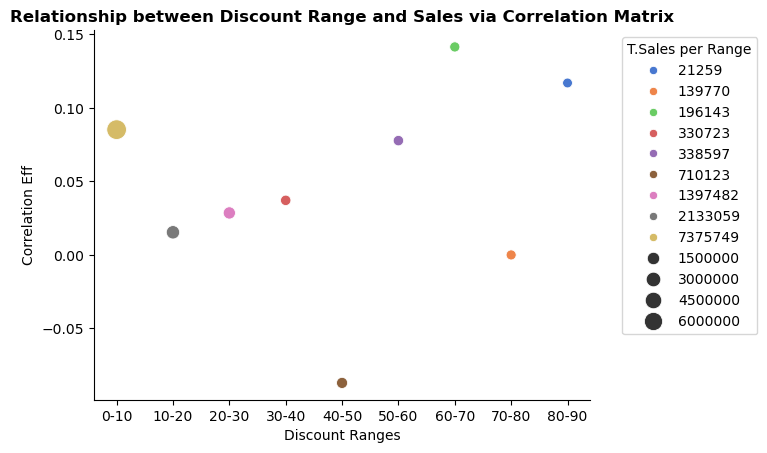

In [6]:
sns.scatterplot(data=df_bin_merged,x='Discount',y='Correlation_x',sizes=(50,200),size='Sales_per_bin',hue='Sales_per_bin',palette='muted')
sns.despine()
plt.title('Relationship between Discount Range and Sales via Correlation Matrix',fontweight='bold')
plt.xlabel('Discount Ranges')
plt.ylabel('Correlation Eff')
plt.legend(loc='best',title='T.Sales per Range',bbox_to_anchor=(1.05,1))
plt.show()